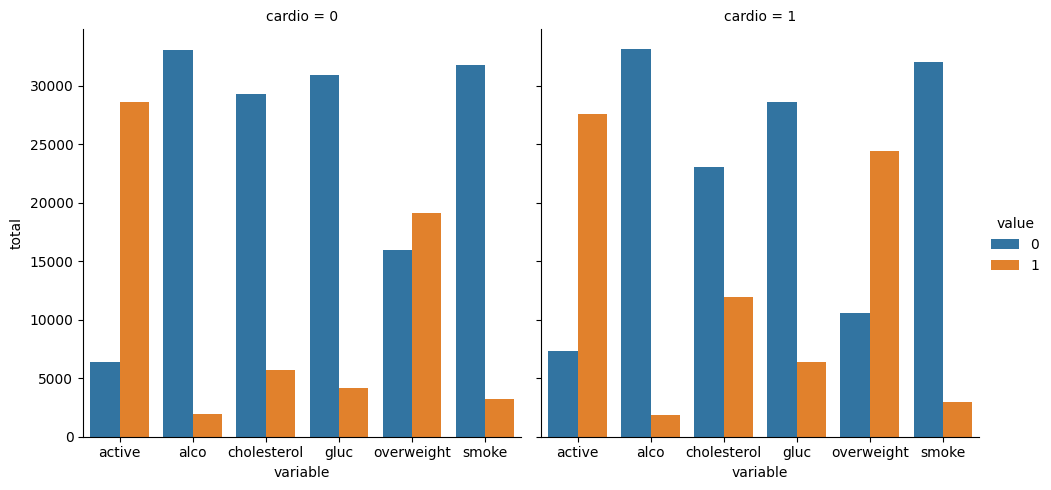

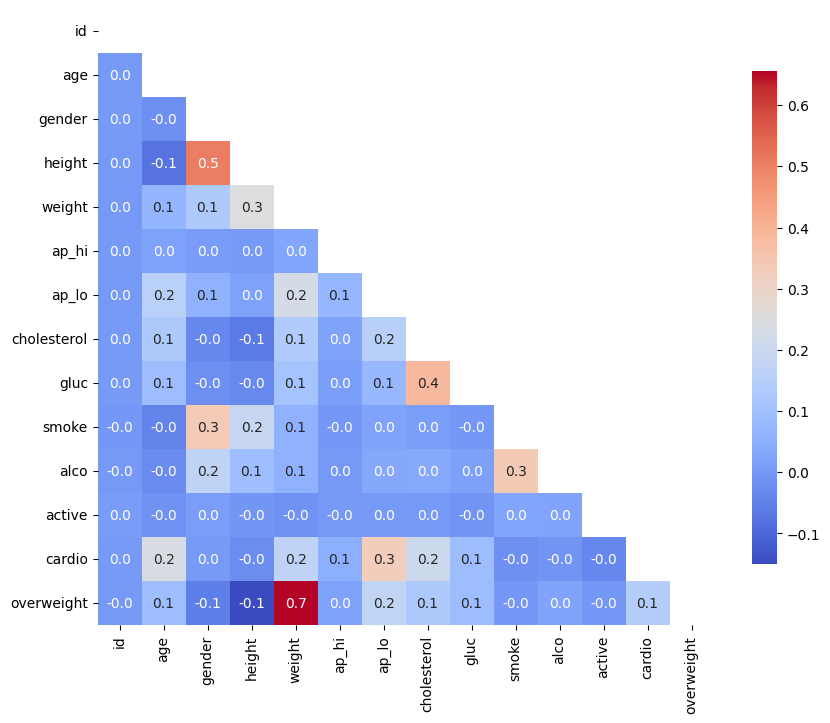

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data
df = pd.read_csv('medical_examination.csv')

# Step 2: Data Preprocessing
# Add 'overweight' column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)) > 25
df['overweight'] = df['overweight'].astype(int)  # Convert boolean to int (0 or 1)

# Normalize cholesterol and gluc
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Step 3: Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # Group and reformat the data
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    # Draw the catplot
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')
    
    # Get the figure for output
    return fig

# Step 4: Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                  (df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975)) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    
    # Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Main function to execute the visualizations
if __name__ == "__main__":
    cat_fig = draw_cat_plot()
    plt.show()  # Show categorical plot
    draw_heat_map()
    plt.show()  # Show heatmap